In [1]:
path_to_mallet = "/Users/jacobbarrett/mallet-2.0.8/bin/mallet"

In [2]:
import little_mallet_wrapper
import seaborn
import glob
from pathlib import Path

In [3]:
directory = "../Data/Periodical-text-files-single-pages/"

In [4]:
files = glob.glob(f"{directory}/*.txt")

In [5]:
files

['../Data/Periodical-text-files-single-pages/AmSn18940802-V09-31-page-5.txt',
 '../Data/Periodical-text-files-single-pages/AmSn18990824-V14-33-page-15.txt',
 '../Data/Periodical-text-files-single-pages/SOL19001101-V15-43-page-6.txt',
 '../Data/Periodical-text-files-single-pages/LibM19091001-V04-04-page-26.txt',
 '../Data/Periodical-text-files-single-pages/SOL19030205-V18-06-page-2.txt',
 '../Data/Periodical-text-files-single-pages/AmSn18920616-V07-24-page-1.txt',
 '../Data/Periodical-text-files-single-pages/SOL19020601-V17-07-page-41.txt',
 '../Data/Periodical-text-files-single-pages/SOL19021201-V17-13-page-19.txt',
 '../Data/Periodical-text-files-single-pages/AmSn18990406-V14-14-page-7.txt',
 '../Data/Periodical-text-files-single-pages/AmSn18970128-V12-04-page-10.txt',
 '../Data/Periodical-text-files-single-pages/AmSn18990907-V14-35-page-3.txt',
 '../Data/Periodical-text-files-single-pages/AmSn19000215-V15-07-page-12.txt',
 '../Data/Periodical-text-files-single-pages/AmSn18911029-V06-

In [6]:
training_data = []

for file in files:
    with open(file, encoding="utf-8") as f:
        text = f.read()
    processed_text = little_mallet_wrapper.process_string(text, numbers="remove")
    training_data.append(processed_text)

In [7]:
original_texts = []

for file in files:
    with open(file, encoding="utf-8") as f:
        text = f.read()
    original_texts.append(text)

In [8]:
periodical_titles = [Path(file).stem for file in files]

In [9]:
periodical_titles

['AmSn18940802-V09-31-page-5',
 'AmSn18990824-V14-33-page-15',
 'SOL19001101-V15-43-page-6',
 'LibM19091001-V04-04-page-26',
 'SOL19030205-V18-06-page-2',
 'AmSn18920616-V07-24-page-1',
 'SOL19020601-V17-07-page-41',
 'SOL19021201-V17-13-page-19',
 'AmSn18990406-V14-14-page-7',
 'AmSn18970128-V12-04-page-10',
 'AmSn18990907-V14-35-page-3',
 'AmSn19000215-V15-07-page-12',
 'AmSn18911029-V06-42-page-2',
 'AmSn18930511-V08-19-page-6',
 'AmSn18901106-V05-44-page-4',
 'AmSn18980310-V13-10-page-14',
 'LibM19090701-V04-03-page-13',
 'AmSn18970325-V12-12-page-8',
 'AmSn18971216-V12-49-page-5',
 'SOL19030319-V18-12-page-5',
 'LibM19081001-V03-04-page-7',
 'AmSn19000222-V15-08-page-2',
 'SOL19020601-V17-07-page-55',
 'LibM19110101-V06-01-page-40',
 'SOL19020201-V17-03-page-63',
 'SOL19000628-V15-25-page-10',
 'AmSn19000823-V15-33-page-16',
 'LibM19091001-V04-04-page-32',
 'AmSn18950131-V10-05-page-5',
 'AmSn18990427-V14-17-page-5',
 'SOL19021201-V17-13-page-25',
 'LibM19100401-V05-02-page-5',
 '

In [10]:
little_mallet_wrapper.print_dataset_stats(training_data)

Number of Documents: 11472
Mean Number of Words per Document: 483.3
Vocabulary Size: 98077


In [11]:
num_topics = 15
training_data = training_data

In [12]:
output_directory_path = '../Data/Periodical-topic-model-output'

In [13]:
Path(f"{output_directory_path}").mkdir(parents=True, exist_ok=True)

path_to_training_data = f"{output_directory_path}/training.txt"
path_to_formatted_training_data = f"{output_directory_path}/mallet.training"
path_to_model = f"{output_directory_path}/mallet.model.{str(num_topics)}"
path_to_topic_keys = f"{output_directory_path}/mallet.topic_keys.{str(num_topics)}"
path_to_topic_distributions = f"{output_directory_path}/mallet.topic_distributions.{str(num_topics)}"

In [14]:
little_mallet_wrapper.quick_train_topic_model(path_to_mallet, 
                                             output_directory_path,
                                             num_topics,
                                             training_data)

Importing data...
Complete
Training topic model...


Mallet LDA: 15 topics, 4 topic bits, 1111 topic mask
Data loaded.
max tokens: 1650
total tokens: 5544003
<10> LL/token: -10.13857
<20> LL/token: -9.51162
<30> LL/token: -9.36552
<40> LL/token: -9.29447

0	0.33333	day sunday sabbath law seventh rest work week one laws observance would first days lord religious people man keep labor 
1	0.33333	world people would men said time one great war peace could spirit come day nations upon history like even never 
2	0.33333	church christian state national religion union reform would christianity catholic churches roman political nation one politics power protestant must movement 
3	0.33333	sentinel american sunday year religious one national per post york address new sent paper union copy paid ordered civil copies 
4	0.33333	one bible sentinel well years would american little much see king people good name many war old last first make 
5	0.33333	religious state religion law civil constitution liberty laws right states shall rights legislation cong

<200> LL/token: -9.1379
[beta: 0.01937] 
<210> LL/token: -9.13123
[beta: 0.02106] 
<220> LL/token: -9.13317
[beta: 0.02157] 
<230> LL/token: -9.13113
[beta: 0.02183] 
<240> LL/token: -9.12669

0	0.38174	day sunday sabbath law rest seventh work week laws one observance religious first people days lord would labor upon keep 
1	0.50045	would men world one people time great war could many man said history spirit peace even good way like let 
2	0.44052	church christian state national religion union reform religious would american people political one nation christianity churches civil sentinel movement make 
3	0.1345	price sentinel cents new address american post york oakland sunday cal paid year copy press religious pacific sent per national 
4	0.11861	bible sentinel one king well new american said pleased see yes would people good names much make name say charlie 
5	0.3698	religious state law states religion shall constitution congress bill laws liberty united legislation court upon con c

[beta: 0.0229] 
<400> LL/token: -9.07999
[beta: 0.02292] 
<410> LL/token: -9.07897
[beta: 0.02298] 
<420> LL/token: -9.07964
[beta: 0.02303] 
<430> LL/token: -9.07778
[beta: 0.02305] 
<440> LL/token: -9.07746

0	0.34049	day sunday sabbath law rest seventh laws week work observance one religious first days would lord labor upon people man 
1	0.53967	one men would people said man many time great good could world see like little well even old upon every 
2	0.42874	church christian national state union religion would reform american people nation religious political government one churches world movement civil country 
3	0.04109	price cents new address pacific cal oakland press pages sunday york health pen post american national bond publishing street religious 
4	0.02312	bible sentinel one new charlie pleased american king names type covenant mama gold silk received teachers round much would well 
5	0.296	religious states congress constitution shall law bill united religion state court up

[beta: 0.02338] 
<600> LL/token: -9.07167
[beta: 0.02333] 
<610> LL/token: -9.07093
[beta: 0.0234] 
<620> LL/token: -9.07091
[beta: 0.02343] 
<630> LL/token: -9.07064
[beta: 0.02344] 
<640> LL/token: -9.07038

0	0.3253	day sunday sabbath law rest seventh laws week work religious one observance first would days lord upon labor keep people 
1	0.54185	men one would people man said time many great good could see like well world every little years old even 
2	0.41774	church christian national state union would american reform people religion political nation religious one churches government movement country world upon 
3	0.03835	price cents new address cal pacific oakland press pages sunday york health pen post national american bond publishing street religious 
4	0.0209	bible sentinel one new charlie american pleased names gold type mama covenant silk received round teachers much well book name 
5	0.25232	states congress shall bill religious constitution united law court sunday upon state

[beta: 0.02361] 
<800> LL/token: -9.06095
[beta: 0.02363] 
<810> LL/token: -9.06054
[beta: 0.02367] 
<820> LL/token: -9.0599
[beta: 0.02365] 
<830> LL/token: -9.05869
[beta: 0.0237] 
<840> LL/token: -9.05769

0	0.32305	day sunday sabbath law rest seventh laws week observance religious work one first would days lord labor upon people keep 
1	0.55473	one would men people said man time great many good well could every see little like world years made old 
2	0.42205	church christian national state union would american reform people religion political one nation churches movement religious sentinel country work united 
3	0.03672	price cents new cal address pacific oakland pages press sunday york health pen post american national publishing bond street religious 
4	0.0198	bible sentinel one new charlie pleased gold american names type mama covenant round silk teachers received price name book much 
5	0.23804	states congress bill shall united constitution religious sunday law upon court legis

[beta: 0.02374] 
<1000> LL/token: -9.04592

Total time: 11 minutes 39 seconds


Complete


([['day',
   'sunday',
   'sabbath',
   'law',
   'rest',
   'seventh',
   'laws',
   'week',
   'religious',
   'observance',
   'work',
   'one',
   'first',
   'lord',
   'would',
   'days',
   'labor',
   'upon',
   'man',
   'keep'],
  ['one',
   'would',
   'men',
   'people',
   'man',
   'said',
   'many',
   'time',
   'good',
   'great',
   'could',
   'well',
   'every',
   'like',
   'see',
   'world',
   'years',
   'life',
   'even',
   'little'],
  ['church',
   'christian',
   'national',
   'state',
   'would',
   'union',
   'american',
   'reform',
   'people',
   'one',
   'political',
   'religion',
   'churches',
   'movement',
   'nation',
   'upon',
   'religious',
   'sentinel',
   'country',
   'work'],
  ['price',
   'cents',
   'new',
   'pacific',
   'address',
   'cal',
   'oakland',
   'press',
   'sunday',
   'pages',
   'york',
   'health',
   'pen',
   'national',
   'american',
   'post',
   'publishing',
   'bond',
   'street',
   'religious'],
  ['b

In [15]:
topics = little_mallet_wrapper.load_topic_keys(path_to_topic_keys)

In [16]:
for topic_number, topic in enumerate(topics):
    print(f"Topic {topic_number}\n\n{topic}\n")

Topic 0

['day', 'sunday', 'sabbath', 'law', 'rest', 'seventh', 'laws', 'week', 'religious', 'observance', 'work', 'one', 'first', 'lord', 'would', 'days', 'labor', 'upon', 'man', 'keep']

Topic 1

['one', 'would', 'men', 'people', 'man', 'said', 'many', 'time', 'good', 'great', 'could', 'well', 'every', 'like', 'see', 'world', 'years', 'life', 'even', 'little']

Topic 2

['church', 'christian', 'national', 'state', 'would', 'union', 'american', 'reform', 'people', 'one', 'political', 'religion', 'churches', 'movement', 'nation', 'upon', 'religious', 'sentinel', 'country', 'work']

Topic 3

['price', 'cents', 'new', 'pacific', 'address', 'cal', 'oakland', 'press', 'sunday', 'pages', 'york', 'health', 'pen', 'national', 'american', 'post', 'publishing', 'bond', 'street', 'religious']

Topic 4

['bible', 'sentinel', 'new', 'one', 'charlie', 'pleased', 'american', 'names', 'type', 'mama', 'covenant', 'gold', 'silk', 'round', 'received', 'teachers', 'corners', 'much', 'name', 'price']

Top

In [17]:
topic_distributions = little_mallet_wrapper.load_topic_distributions(path_to_topic_distributions)

In [18]:
topic_distributions[32]

[0.0007734510281150996,
 0.003828032372433535,
 0.0035538671877855246,
 8.984082150726344e-05,
 4.705818391437608e-05,
 0.0005615487012255924,
 0.0004580955757064132,
 0.0062676881060425745,
 0.000561283786412894,
 0.000585331493692437,
 0.034591220005580285,
 0.00036686915593089225,
 0.0002880835805609335,
 0.0006967934688697164,
 0.9473308365322224]

In [20]:
import random
target_labels = random.sample(periodical_titles, 10)

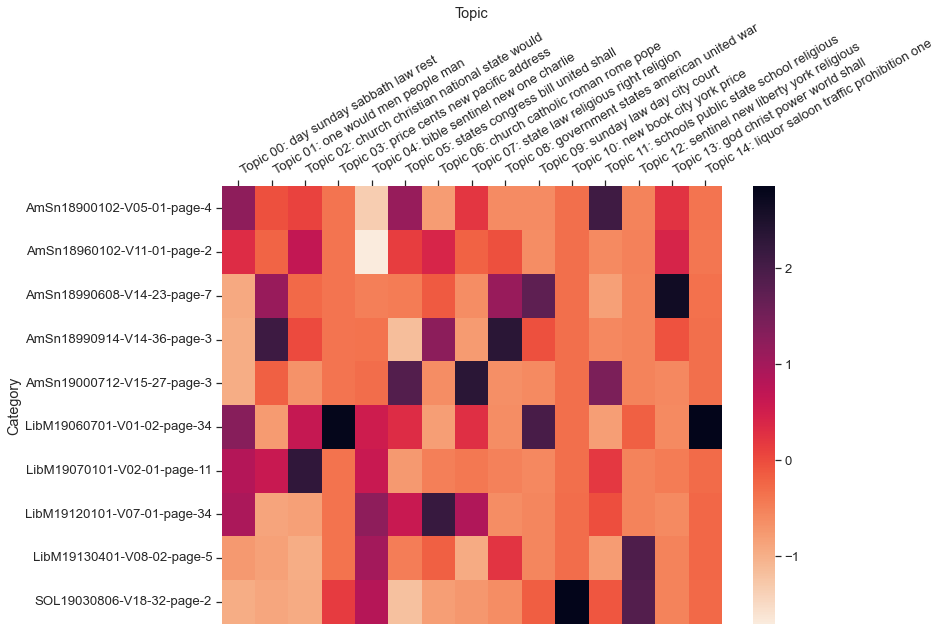

In [21]:
little_mallet_wrapper.plot_categories_by_topics_heatmap(periodical_titles,
                                                       topic_distributions,
                                                       topics,
                                                       output_directory_path + '/categories_by_topics.pdf',
                                                       target_labels=target_labels,
                                                       dim= (13,9)
                                                       )

In [25]:
training_data_periodical_titles = dict(zip(training_data, periodical_titles))
training_data_original_text = dict(zip(training_data, original_texts))

In [26]:
def display_top_titles_per_topic(topic_number=0, number_of_documents=5):
    print(f"Topic {topic_number}\n\n{topics[topic_number]}\n")
    
    for probability,document in little_mallet_wrapper.get_top_docs(training_data, topic_distributions, topic_number, n=number_of_documents):
        print(round(probability, 4), training_data_periodical_titles[document] + "\n")
    return

In [27]:
display_top_titles_per_topic(topic_number=0, number_of_documents=5)

Topic 0

['day', 'sunday', 'sabbath', 'law', 'rest', 'seventh', 'laws', 'week', 'religious', 'observance', 'work', 'one', 'first', 'lord', 'would', 'days', 'labor', 'upon', 'man', 'keep']

0.7598 SOL19030910-V18-37-page-8

0.7174 AmSn19000405-V15-14-page-2

0.7113 SOL19030910-V18-37-page-3

0.7078 AmSn18910312-V06-11-page-2

0.7019 SOL19020601-V17-07-page-42

